# Big Data Processes - exercise no. 7
# <font color= green>Classification</font>

### 1. Importing various libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### 2. Load and examine the data

In [2]:
file_name = "ex7_data.csv"
dataset= pd.read_csv(file_name)

In [3]:
dataset.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Today, we are gonna work with the **ex7** dataset.  It contains information on whether someone bought a car or not and their estimated salary, age etc.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## <font color= green>K-Nearest Neighbor for classification</font>

### 3. Construct the correlation matrix, define feature and target vectors and import the KNN classifier

We create a correlation matrix in order to choose the feature for our target.

<AxesSubplot:>

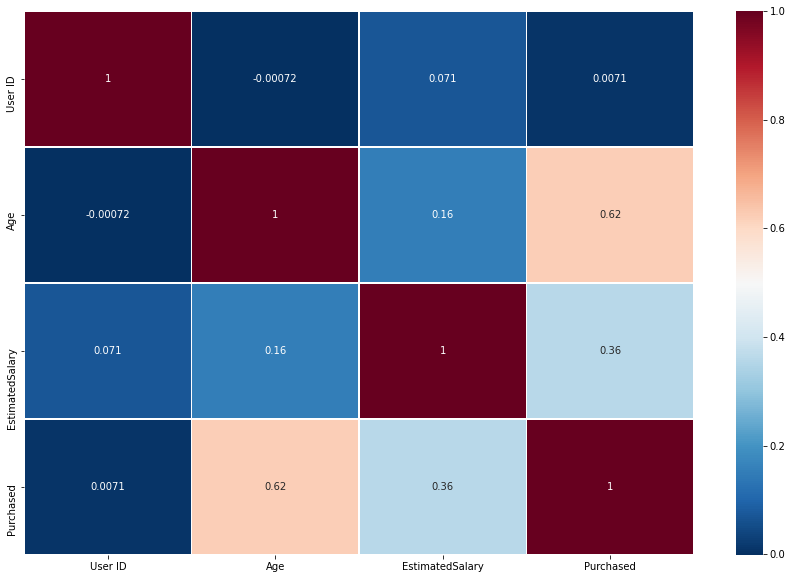

In [5]:
corr = dataset.corr(method='pearson')
#Pearson - Visual heatmap
fig, ax = plt.subplots(figsize=(15,10)) #for size of figure
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax)

##### Question 1: 
I want to create a model that can predict whether someone bought the car or not. Which variable would you choose as the feature in addition to estimated salary?

In [6]:
#Create the feature and target vectors
X = dataset[["EstimatedSalary", 'Age']].values
y = dataset['Purchased'].values

In [7]:
#Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

#### Two quick facts about KNN 

- KNN classifies x based on most probable class. Most probable is based on most common (see picture below).
- One essential decision to make when constructing a KNN classifier is to choose the number of n-neigbours (Ks)

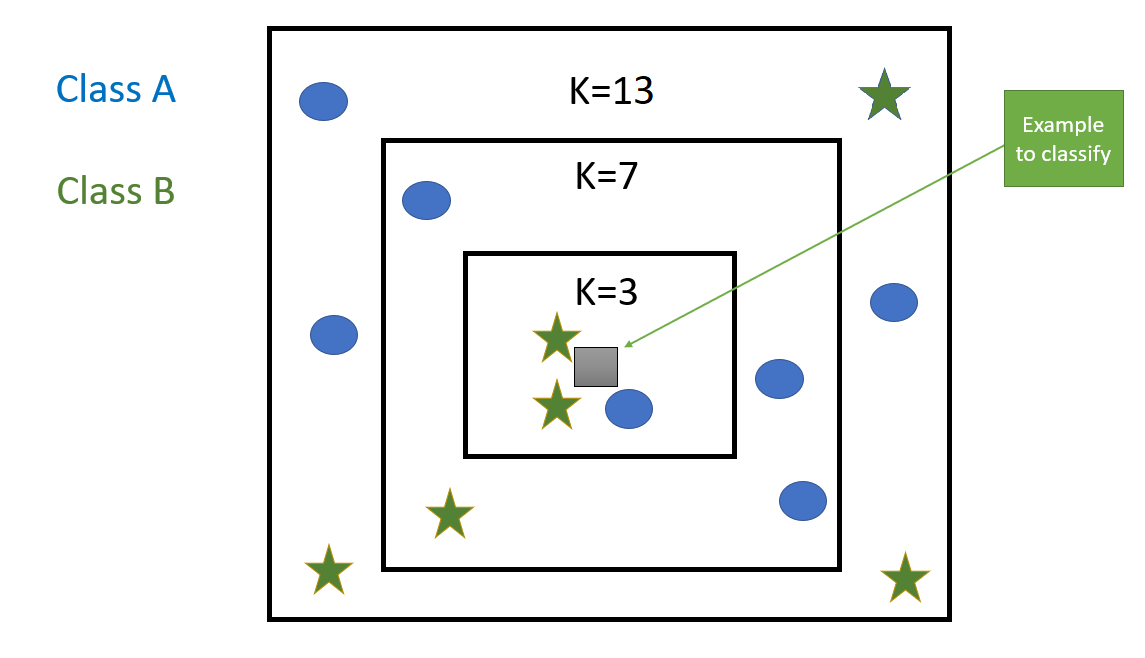

##### Question 2: 
With K=3 the KNN algorithm would classify the unknown example as a green star (class B). What would the algorithm classify it as with K=7 and K=13?

### 4. Split the data in training and test sample

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

How does the X_train look like:

In [9]:
X_train

array([[144000,     58],
       [ 83000,     59],
       [ 55000,     24],
       [ 35000,     26],
       [ 38000,     58],
       [ 80000,     42],
       [ 75000,     40],
       [130000,     59],
       [ 41000,     46],
       [ 60000,     41],
       [ 64000,     42],
       [146000,     37],
       [ 48000,     23],
       [ 33000,     25],
       [ 84000,     24],
       [ 96000,     27],
       [ 63000,     23],
       [ 33000,     48],
       [ 90000,     48],
       [104000,     42],
       [ 39000,     44],
       [120000,     32],
       [ 50000,     38],
       [135000,     32],
       [ 21000,     52],
       [104000,     53],
       [ 42000,     39],
       [ 61000,     38],
       [ 50000,     36],
       [ 63000,     36],
       [ 25000,     35],
       [ 50000,     35],
       [ 73000,     42],
       [ 49000,     47],
       [ 29000,     59],
       [ 65000,     49],
       [131000,     45],
       [ 89000,     31],
       [ 82000,     46],
       [ 51000,     47],


### 5. Create the model, fit it on the data and test performance

In [10]:
model_KNN = KNeighborsClassifier(n_neighbors=3)

In [11]:
#fit the model object on the training data
model_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

What does the y_test look like

In [12]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [13]:
#measure accuracy score on the test data
accuracy_test = round(model_KNN.score(X_test,y_test),4)
accuracy_test

0.7875

In [14]:
#meassure cross validation score
cross_val_scores = cross_val_score(model_KNN, X_train, y_train, cv=5, scoring='accuracy')
print(cross_val_scores.mean())

0.8


### <font color= orange>Cross validation</font>

**Cross-validation** or **k-fold cross-validation** means that the training dataset is randomly split up into ‘k’ groups (normally 5 or 10). One of the groups is used as the validation set and the rest are used as the training set. The model is trained on the training set and scored on the validation set. Then the process is repeated until each unique group as been used as the validation set.

#### <font color= red>Do not touch your test set with the cross validation! Your algorithm is not allowed to know anything about the test set before you measure accuracy score on the test set!</font>



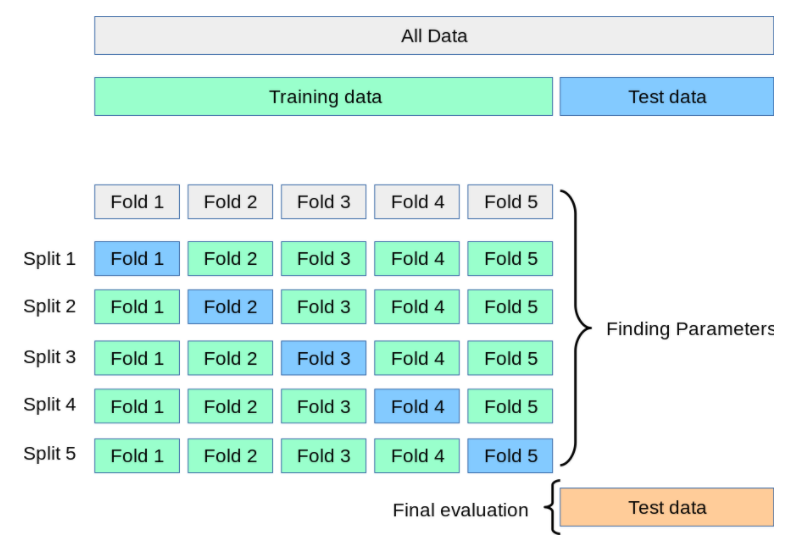

<font size = 3> source: https://scikit-learn.org/stable/modules/cross_validation.html

#### <font color= green>6. Confusion Matrix</font>

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
y_pred = model_KNN.predict(X)
cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)

[[232  25]
 [ 29 114]]


<AxesSubplot:>

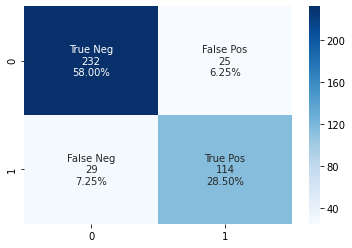

In [17]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

### 7. Hyperparameter tuning

We can optimize this accuracy score through hyperparameter tuning. Hyperparameter tuning is when you change a hyperparameter in order to increase the accuracy of your model. We can find the optimal number of n-neighbours for our KNN model. 

**Remember that hyperparameter turning finds the hyperparameters which give the best accuracy scores, but that does not mean that it is the best hyperparameters for your model.**

#### <font color= green>GridSearchCV</font>

Optimal number of n-neighbours can for example be found through the GridSearchCV. GridSearchCV in our case will test all unequal values of n-neighbours between 3 and 25 and determine which value gives the highest accuracy 

<font color= red>WARNING: GridSearchCV will test all hyperparameters provided to it. Consequently, if your dataset is large it can take quite some time.</font>

We can then insert this n-neigbours value that GridSearchCV will propose to us in our KNN model and run it again to hopefully acquire a higher accuracy score. You can also test other hyperparameters than n-neighbours through GridSEearchCV. Read more in the documentation (link below):


- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [18]:
#import GridSearchCV to find top performing n_neighbors based on accuracy
from sklearn.model_selection import GridSearchCV

In [19]:
#create new knn model objects from class
model_Grid = KNeighborsClassifier()

In [20]:
#We develop a dictionary of all values we want to test for n_neighbors for the substance_predicter_KNN
test_grid = {"n_neighbors": [3,5,7,9,11,13,15,17,19,21,23,25] }

In [21]:
#We use gridsearch to test the values for n_neighbors
model_gscv = GridSearchCV(model_Grid, test_grid, scoring='accuracy')

In [22]:
#fit model to training data
model_gscv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25]},
             scoring='accuracy')

In [23]:
#find top performing n_neighbors 
model_gscv.best_params_

{'n_neighbors': 23}

#### <font color= green>Error rate</font>

Error rate is the proportion of classifications our model did incorrectly. Consequently, we want to find the n-neighbours with the lowest error rate and use that for our model: 

In [24]:
#find top performing n_neighbors based on error rate
error_rate = []
for n in [3,5,7,9,11,13,15,17,19,21,23,25]:
    model_error = KNeighborsClassifier(n_neighbors=n)
    model_error.fit(X_train,y_train)
    pred_n = model_error.predict(X_test)
    error_rate.append(np.mean(pred_n != y_test))

Text(0, 0.5, 'Error Rate')

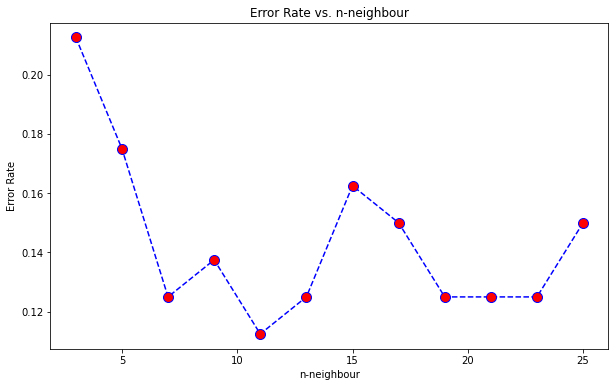

In [25]:
#visualize error rate vs. n-neighbour
plt.figure(figsize=(10,6))
plt.plot([3,5,7,9,11,13,15,17,19,21,23,25],error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n-neighbour')
plt.xlabel('n-neighbour')
plt.ylabel('Error Rate')

##### Question 3: 
Which n-neighbours value would you choose based on the error rate? 

##### Question 4: 
Why do you think that GridSearchCV wants us to use 23 n-neighbours while the error rate based test wants us to use 11 n-neighbours? 

### 8. Visualizing performance

In [26]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

First, let us plot the data to see how it looks.

<function matplotlib.pyplot.show(close=None, block=None)>

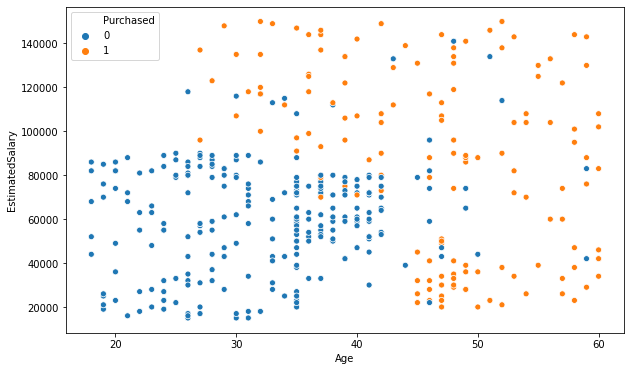

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= dataset['Age'], y= dataset['EstimatedSalary'], hue = dataset['Purchased'], data = dataset)
plt.show

Now we visualize how well our model performed on the data

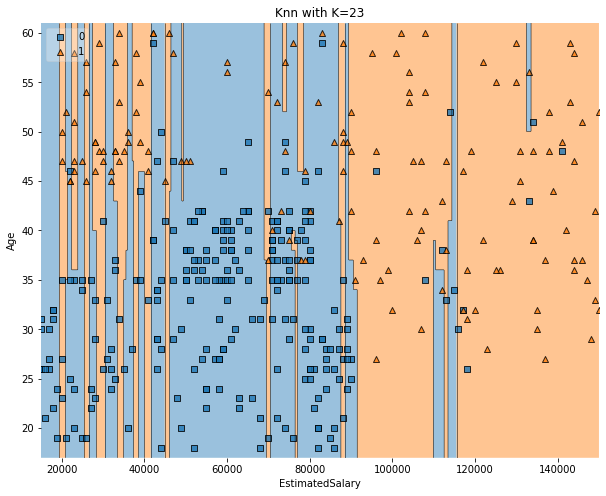

In [28]:
def knn_comparison(data, k):
# Plotting decision region
    plt.figure(figsize=(10,8))
    plot_decision_regions(X, y, clf=model_KNN, legend=2)
# Adding axes annotations
    plt.xlabel('EstimatedSalary')
    plt.ylabel('Age')
    plt.title('Knn with K='+ str(k))
    plt.show()
for i in [23]:
    knn_comparison(dataset, i)


Blue squares corespond to **Purchased = 0** and orange triangles to **Purchased = 1**. Whenever there is a blue square on a orange background, it means that the dot (data point) was wrongly classified, the same for orange triangles on blue background.  
    
If you take a closer look at the scatter plot and compare it to our confusion matrix, you can actually count the 25 False Positives(blue squares on orange background) and the 29 False Negatives (orange triangles on blue background).  

## <font color= green>Random forest for classification</font>

We have already loaded our data and defined our feature and vector so we go straight to importing the random forests classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

Create an object from the model's class

In [30]:
model_RF = RandomForestClassifier(n_estimators = 2, min_samples_split = 30, random_state=0)

- n_estimators define how many trees the random forest should produce. You find the optimal n_estimators by balancing the highest possible test score and cross validation score without overfitting the data 
- min_samples_split is the minimum number of samples required to split an internal node. It is normally set to 20, but you should consider the size of your dataset, interpretability of visualizations and R^2 score before deciding on a min_samples_split value

- Documentation on RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Let us look at X_train again so we know what we fit on:

In [31]:
X_train

array([[144000,     58],
       [ 83000,     59],
       [ 55000,     24],
       [ 35000,     26],
       [ 38000,     58],
       [ 80000,     42],
       [ 75000,     40],
       [130000,     59],
       [ 41000,     46],
       [ 60000,     41],
       [ 64000,     42],
       [146000,     37],
       [ 48000,     23],
       [ 33000,     25],
       [ 84000,     24],
       [ 96000,     27],
       [ 63000,     23],
       [ 33000,     48],
       [ 90000,     48],
       [104000,     42],
       [ 39000,     44],
       [120000,     32],
       [ 50000,     38],
       [135000,     32],
       [ 21000,     52],
       [104000,     53],
       [ 42000,     39],
       [ 61000,     38],
       [ 50000,     36],
       [ 63000,     36],
       [ 25000,     35],
       [ 50000,     35],
       [ 73000,     42],
       [ 49000,     47],
       [ 29000,     59],
       [ 65000,     49],
       [131000,     45],
       [ 89000,     31],
       [ 82000,     46],
       [ 51000,     47],


In [32]:
#fit the diagnose_predicter_RF on the training data
model_RF.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=30, n_estimators=2, random_state=0)

#### Measure performance

In [33]:
#measure accuracy score on the test data
accuracy_test = round(model_RF.score(X_test,y_test),4)
accuracy_test

0.95

In [34]:
#measure cross validation score
cross_val_scores = cross_val_score(model_RF, X_train, y_train, cv=5, scoring='accuracy')
print(cross_val_scores.mean())

0.878125


#### Confusion matrix

In [35]:
y_pred2 = model_RF.predict(X)
cf_matrix_RF = confusion_matrix(y, y_pred2)
print(cf_matrix_RF)

[[235  22]
 [ 15 128]]


<AxesSubplot:>

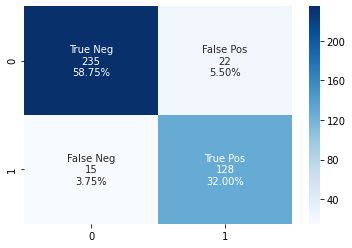

In [36]:
group_names2 = ["True Neg","False Pos","False Neg","True Pos"]
group_counts2 = ["{0:0.0f}".format(value) for value in
                cf_matrix_RF.flatten()]
group_percentages2 = ["{0:.2%}".format(value) for value in
                     cf_matrix_RF.flatten()/np.sum(cf_matrix_RF)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names2,group_counts2,group_percentages2)]
labels2 = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_RF, annot=labels2, fmt="", cmap='Blues')

##### Question 5: 
Which algorithm has most accurate performance? The KNN or the random forest classifier?

### 9. Hyperparameter tuning for the random forest:

In [37]:
#We import the RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

We create a parameter grid to sample from during fitting. Remember that the two parameters we want to tune are min_samples_split and n_estimators

In [38]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

In [39]:
# Minimum number of samples required to split a node
min_samples_split = [10,15,20,25,30]

In [40]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [10, 15, 20, 25, 30]}


**The performance vs. time tradeoff:** On each iteration, the algorithm will choose a different combination of the features. Consequently, because we are tuning two different hyperparameters it means in this case the RandomizedSearchCV will test: 10 different n_estimators * 5 different min_samples_split = 50 combinations. Like with GridSearchCV, this will take some time. 

<font color= red>**As a data scientist, we must consequently evaluate whether the value created through the tuning can justify the time spend on it.**</font>

#### Use random grid to search for best hyperparameters

In [41]:
# First create the base model to tune
model_RF_tune = RandomForestClassifier(random_state=0)

In [42]:

rf_random = RandomizedSearchCV(estimator = model_RF_tune, param_distributions = random_grid, cv = 5, n_jobs = -1, n_iter = 25, random_state=0)

- cv = 5 means that we test the different combinations through 5-fold cross validation
- n_jobs = -1 we use all available cores in your computer to test this. 
- N_iter = 25 means that we will make the algorithm perform 25 iterations. It describes number of parameter settings that are sampled. It is here and in the cross validation you as data scientist must take a decision in relation to the performance vs. time tradeoff! 
- There are many more parameters to tune in the RandomizedSeachCV. Take a look at the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [43]:
# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'min_samples_split': [10, 15, 20, 25,
                                                              30],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=0)

In [44]:
rf_random.best_params_

{'n_estimators': 90, 'min_samples_split': 20}

Go back to the random forest model object and change the hyperparameters. Run the cross validation and train-test split again and see how the scores change

### Visualize some of the trees in the random forest:

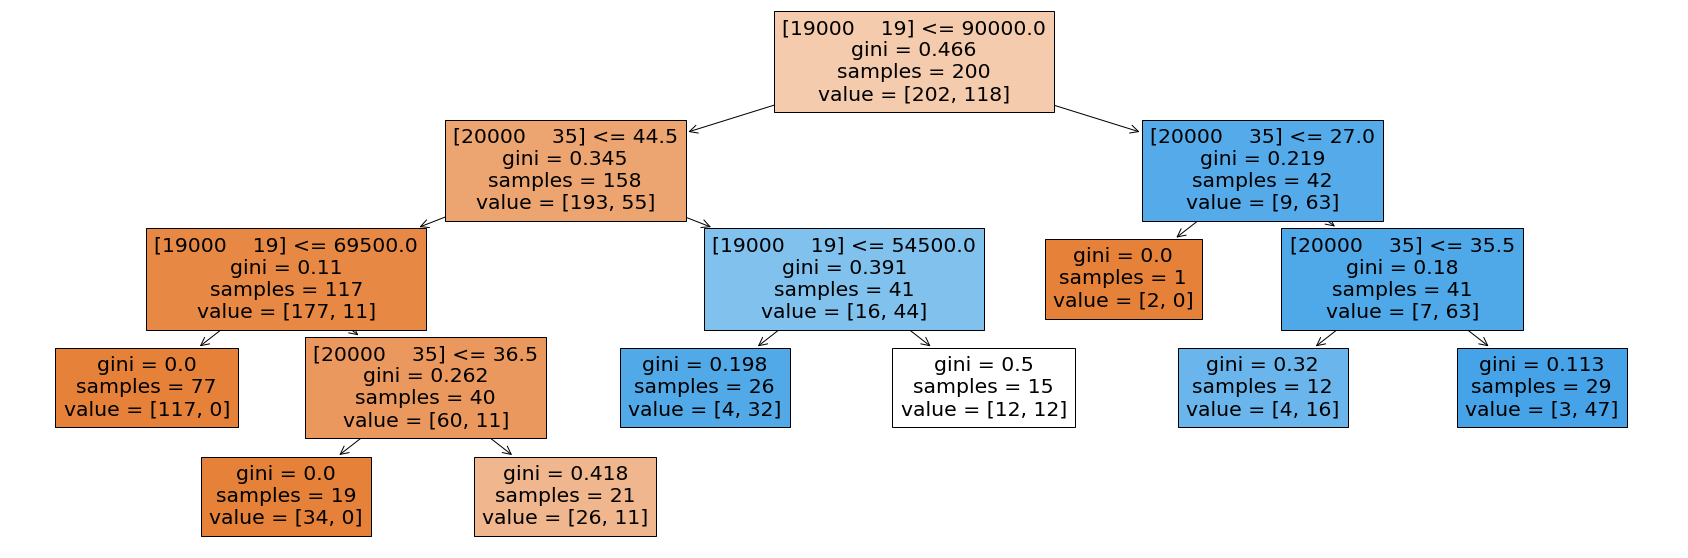

In [45]:
#visualizing the first tree
from sklearn import tree
fig, ax = plt.subplots(figsize=(30, 10))
tree_1 = tree.plot_tree(model_RF.estimators_[0], feature_names=X, filled=True, ax=ax)

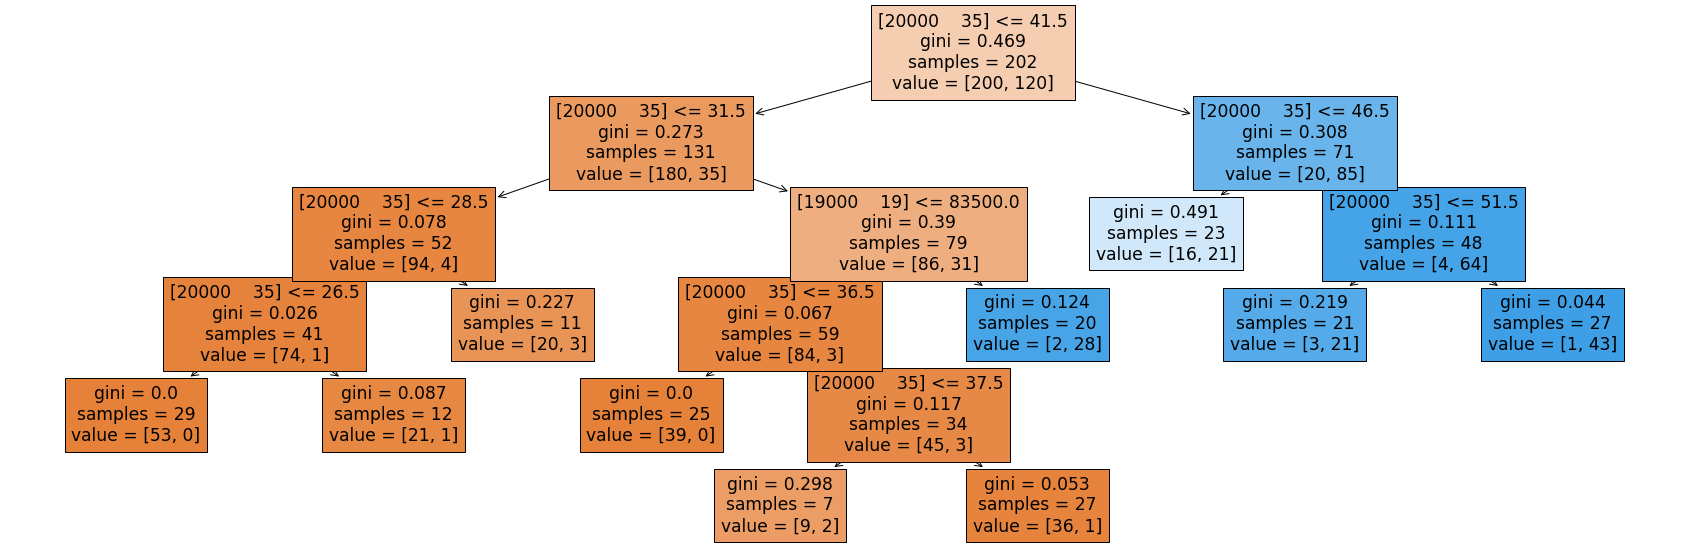

In [46]:
fig, ax = plt.subplots(figsize=(30, 10))
tree_2 = tree.plot_tree(model_RF.estimators_[1], feature_names=X, filled=True, ax=ax)

### Exercises: Apply the kNN and random forest classification models on your own datasets.

## <font color = blue>Have a wonderful day :-) 